<a href="https://colab.research.google.com/github/hanafimajid/autogluon-mtr/blob/main/autogluon_enb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogluon

import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 962.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving enb.csv to enb.csv


In [ ]:
import pandas as pd
df = pd.read_csv("enb.csv")
df.head()
y_col = [
'Y1',
'Y2'

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head(20)


,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
5,21.46,25.38
6,20.71,25.16
7,19.68,29.60
8,19.50,27.30
9,19.95,21.97


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import StandardScaler
scaler_std=StandardScaler()

X_train=scaler_std.fit_transform(X_train)
X_test=scaler_std.fit_transform(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
y_train.head(50)

In [ ]:
X_autogluon = pd.concat([X_train, y_train], axis=1)
X_autogluon.head(10)

,Relative_compactness,X1,X3,X4,X5,X6,X7,X8,Y1,Y2
318,0.71,710.5,269.5,220.50,3.5,4,0.25,1,12.57,15.44
313,0.74,686.0,245.0,220.50,3.5,3,0.25,1,12.50,15.50
195,0.98,514.5,294.0,110.25,7.0,5,0.10,4,24.32,25.87
570,0.64,784.0,343.0,220.50,3.5,4,0.40,1,19.48,22.72
226,0.69,735.0,294.0,220.50,3.5,4,0.10,4,11.07,14.42
689,0.79,637.0,343.0,147.00,7.0,3,0.40,4,41.73,47.59
121,0.74,686.0,245.0,220.50,3.5,3,0.10,2,10.46,13.72
654,0.71,710.5,269.5,220.50,3.5,4,0.40,3,13.94,16.70
161,0.79,637.0,343.0,147.00,7.0,3,0.10,3,35.48,41.22
178,0.69,735.0,294.0,220.50,3.5,4,0.10,3,11.10,14.67


In [ ]:
# Handle NaN values (e.g., impute or drop)
# For example, impute with mean
X_autogluon.fillna(X_autogluon.mean(), inplace=True)
X_autogluon.head(10)

,Relative_compactness,X1,X3,X4,X5,X6,X7,X8,Y1,Y2
318,0.71,710.5,269.5,220.50,3.5,4,0.25,1,12.57,15.44
313,0.74,686.0,245.0,220.50,3.5,3,0.25,1,12.50,15.50
195,0.98,514.5,294.0,110.25,7.0,5,0.10,4,24.32,25.87
570,0.64,784.0,343.0,220.50,3.5,4,0.40,1,19.48,22.72
226,0.69,735.0,294.0,220.50,3.5,4,0.10,4,11.07,14.42
689,0.79,637.0,343.0,147.00,7.0,3,0.40,4,41.73,47.59
121,0.74,686.0,245.0,220.50,3.5,3,0.10,2,10.46,13.72
654,0.71,710.5,269.5,220.50,3.5,4,0.40,3,13.94,16.70
161,0.79,637.0,343.0,147.00,7.0,3,0.10,3,35.48,41.22
178,0.69,735.0,294.0,220.50,3.5,4,0.10,3,11.10,14.67


In [ ]:
!pip install autogluon.core
!pip install autogluon.features
!pip install autogluon.text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.9/309.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 772.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install autogluon.tabular

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00
  Using cached autogluon.core-1.0.0-py3-none-any.whl (229 kB)
  Using cached autogluon.features-1.0.0-py3-none-any.whl (62 kB)
  Using cached autogluon.common-1.0.0-py3-none-any.whl (64 kB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: autogluon.comm

In [ ]:
import autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
import autogluon
from autogluon.common.utils.utils import setup_outputdir

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
#from autogluon.core.utils.utils import setup_outputdir
from autogluon.core.utils.loaders import load_pkl
from autogluon.core.utils.savers import save_pkl
import os.path

class MultilabelPredictor():
    """ Tabular Predictor for predicting multiple columns in table.
        Creates multiple TabularPredictor objects which you can also use individually.
        You can access the TabularPredictor for a particular label via: `multilabel_predictor.get_predictor(label_i)`

        Parameters
        ----------
        labels : List[str]
            The ith element of this list is the column (i.e. `label`) predicted by the ith TabularPredictor stored in this object.
        path : str
            Path to directory where models and intermediate outputs should be saved.
            If unspecified, a time-stamped folder called "AutogluonModels/ag-[TIMESTAMP]" will be created in the working directory to store all models.
            Note: To call `fit()` twice and save all results of each fit, you must specify different `path` locations or don't specify `path` at all.
            Otherwise files from first `fit()` will be overwritten by second `fit()`.
            Caution: when predicting many labels, this directory may grow large as it needs to store many TabularPredictors.
        problem_types : List[str]
            The ith element is the `problem_type` for the ith TabularPredictor stored in this object.
        eval_metrics : List[str]
            The ith element is the `eval_metric` for the ith TabularPredictor stored in this object.
        consider_labels_correlation : bool
            Whether the predictions of multiple labels should account for label correlations or predict each label independently of the others.
            If True, the ordering of `labels` may affect resulting accuracy as each label is predicted conditional on the previous labels appearing earlier in this list (i.e. in an auto-regressive fashion).
            Set to False if during inference you may want to individually use just the ith TabularPredictor without predicting all the other labels.
        kwargs :
            Arguments passed into the initialization of each TabularPredictor.

    """

    multi_predictor_file = 'multilabel_predictor.pkl'

    def __init__(self, labels, path, problem_types=None, eval_metrics=None, consider_labels_correlation=True, **kwargs):
        if len(labels) < 2:
            raise ValueError("MultilabelPredictor is only intended for predicting MULTIPLE labels (columns), use TabularPredictor for predicting one label (column).")
        self.path = setup_outputdir(path, warn_if_exist=False)
        self.labels = labels
        self.consider_labels_correlation = consider_labels_correlation
        self.predictors = {}  # key = label, value = TabularPredictor or str path to the TabularPredictor for this label
        if eval_metrics is None:
            self.eval_metrics = {}
        else:
            self.eval_metrics = {labels[i] : eval_metrics[i] for i in range(len(labels))}
        problem_type = None
        eval_metric = None
        for i in range(len(labels)):
            label = labels[i]
            path_i = self.path + "Predictor_" + label
            if problem_types is not None:
                problem_type = problem_types[i]
            if eval_metrics is not None:
                eval_metric = self.eval_metrics[label]
            self.predictors[label] = TabularPredictor(label=label, problem_type=problem_type, eval_metric=eval_metric, path=path_i, **kwargs)

    def fit(self, train_data, tuning_data=None, **kwargs):
        """ Fits a separate TabularPredictor to predict each of the labels.

            Parameters
            ----------
            train_data, tuning_data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                See documentation for `TabularPredictor.fit()`.
            kwargs :
                Arguments passed into the `fit()` call for each TabularPredictor.
        """
        if isinstance(train_data, str):
            train_data = TabularDataset(train_data)
        if tuning_data is not None and isinstance(tuning_data, str):
            tuning_data = TabularDataset(tuning_data)
        train_data_og = train_data.copy()
        if tuning_data is not None:
            tuning_data_og = tuning_data.copy()
        else:
            tuning_data_og = None
        save_metrics = len(self.eval_metrics) == 0
        for i in range(len(self.labels)):
            label = self.labels[i]
            predictor = self.get_predictor(label)
            if not self.consider_labels_correlation:
                labels_to_drop = [l for l in self.labels if l != label]
            else:
                labels_to_drop = [self.labels[j] for j in range(i+1, len(self.labels))]
            train_data = train_data_og.drop(labels_to_drop, axis=1)
            if tuning_data is not None:
                tuning_data = tuning_data_og.drop(labels_to_drop, axis=1)
            print(f"Fitting TabularPredictor for label: {label} ...")
            predictor.fit(train_data=train_data, tuning_data=tuning_data, **kwargs)
            self.predictors[label] = predictor.path
            if save_metrics:
                self.eval_metrics[label] = predictor.eval_metric
        self.save()

    def predict(self, data, **kwargs):
        """ Returns DataFrame with label columns containing predictions for each label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to make predictions for. If label columns are present in this data, they will be ignored. See documentation for `TabularPredictor.predict()`.
            kwargs :
                Arguments passed into the predict() call for each TabularPredictor.
        """
        return self._predict(data, as_proba=False, **kwargs)

    def predict_proba(self, data, **kwargs):
        """ Returns dict where each key is a label and the corresponding value is the `predict_proba()` output for just that label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to make predictions for. See documentation for `TabularPredictor.predict()` and `TabularPredictor.predict_proba()`.
            kwargs :
                Arguments passed into the `predict_proba()` call for each TabularPredictor (also passed into a `predict()` call).
        """
        return self._predict(data, as_proba=True, **kwargs)

    def evaluate(self, data, **kwargs):
        """ Returns dict where each key is a label and the corresponding value is the `evaluate()` output for just that label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to evalate predictions of all labels for, must contain all labels as columns. See documentation for `TabularPredictor.evaluate()`.
            kwargs :
                Arguments passed into the `evaluate()` call for each TabularPredictor (also passed into the `predict()` call).
        """
        data = self._get_data(data)
        eval_dict = {}
        for label in self.labels:
            print(f"Evaluating TabularPredictor for label: {label} ...")
            predictor = self.get_predictor(label)
            eval_dict[label] = predictor.evaluate(data, **kwargs)
            if self.consider_labels_correlation:
                data[label] = predictor.predict(data, **kwargs)
        return eval_dict



    def save(self):
        """ Save MultilabelPredictor to disk. """
        for label in self.labels:
            if not isinstance(self.predictors[label], str):
                self.predictors[label] = self.predictors[label].path
        save_pkl.save(path=self.path+self.multi_predictor_file, object=self)
        print(f"MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('{self.path}')")

    @classmethod
    def load(cls, path):
        """ Load MultilabelPredictor from disk `path` previously specified when creating this MultilabelPredictor. """
        path = os.path.expanduser(path)
        if path[-1] != os.path.sep:
            path = path + os.path.sep
        return load_pkl.load(path=path+cls.multi_predictor_file)

    def get_predictor(self, label):
        """ Returns TabularPredictor which is used to predict this label. """
        predictor = self.predictors[label]
        if isinstance(predictor, str):
            return TabularPredictor.load(path=predictor)
        return predictor

    def _get_data(self, data):
        if isinstance(data, str):
            return TabularDataset(data)
        return data.copy()

    def _predict(self, data, as_proba=False, **kwargs):
        data = self._get_data(data)
        if as_proba:
            predproba_dict = {}
        for label in self.labels:
            print(f"Predicting with TabularPredictor for label: {label} ...")
            predictor = self.get_predictor(label)
            if as_proba:
                predproba_dict[label] = predictor.predict_proba(data, as_multiclass=True, **kwargs)
            data[label] = predictor.predict(data, **kwargs)
        if not as_proba:
            return data[self.labels]
        else:
            return predproba_dict

In [ ]:
labels = ['Y1','Y2']  # which columns to predict based on the others
problem_types = ['regression','regression']  # type of each prediction problem
save_path = 'Models-predictMTR'  # specifies folder to store trained models

time_limit = 3600  # how many seconds to train the TabularPredictor for each label, set much larger in your applications!

In [ ]:
import autogluon
from autogluon.common.utils.utils import setup_outputdir

multi_predictor = MultilabelPredictor(labels=labels, problem_types=problem_types,path=save_path)
multi_predictor.fit(X_autogluon, time_limit=time_limit)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "Models-predictMTRPredictor_Y1"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.88 GB / 12.67 GB (85.9%

Fitting TabularPredictor for label: Y1 ...


	-2.7718	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 3599.83s of the 3599.82s of remaining time.
		module 'pandas.core.strings' has no attribute 'StringMethods'
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1817, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1763, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 854, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogl

Fitting TabularPredictor for label: Y2 ...


	-2.0044	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 3599.8s of the 3599.8s of remaining time.
		module 'pandas.core.strings' has no attribute 'StringMethods'
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1817, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 1763, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 854, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluo

MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('Models-predictMTR')


In [ ]:
test_data_nolab = X_autogluon.drop(columns=labels)
#multi_predictor = MultilabelPredictor.load('agModels-predictEducationClassmultilabel_predictor.pkl')  # unnecessary, just demonstrates how to load previously-trained multilabel predictor from file

predictions = multi_predictor.predict(test_data_nolab)
print("Predictions:  \n", predictions)

Predicting with TabularPredictor for label: Y1 ...
Predicting with TabularPredictor for label: Y2 ...
Predictions:  
             Y1         Y2
318  12.552288  15.422316
313  12.617032  15.391961
195  24.344109  26.267246
570  19.453831  22.677910
226  11.072195  14.510251
..         ...        ...
98   24.107500  25.411697
322  12.732120  15.535268
382  14.620564  15.382069
365  12.409670  15.119624
510  12.263690  15.033119

[614 rows x 2 columns]


In [ ]:
evaluations = multi_predictor.evaluate(X_autogluon)
print(evaluations)
print("Evaluated using metrics:", multi_predictor.eval_metrics)

Evaluating TabularPredictor for label: Y1 ...
Evaluating TabularPredictor for label: Y2 ...
{'Y1': {'root_mean_squared_error': -0.16108302995164708, 'mean_squared_error': -0.025947742538403228, 'mean_absolute_error': -0.07642093276356253, 'r2': 0.9997529009525168, 'pearsonr': 0.9998769274687941, 'median_absolute_error': -0.03535140991211083}, 'Y2': {'root_mean_squared_error': -0.6818397944795843, 'mean_squared_error': -0.4649055053359618, 'mean_absolute_error': -0.3424175906103675, 'r2': 0.9950692697157155, 'pearsonr': 0.9975383618378614, 'median_absolute_error': -0.14388584136963}}
Evaluated using metrics: {'Y1': root_mean_squared_error, 'Y2': root_mean_squared_error}


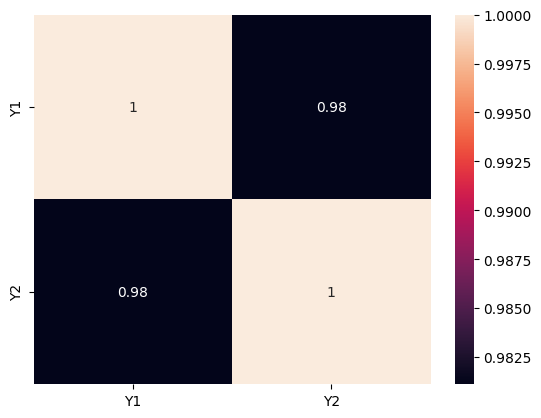

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(predictions)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
# Get the two rightmost columns
rightmost_columns = X_autogluon.iloc[:, -2:]
rightmost_columns

,Y1,Y2
318,12.57,15.44
313,12.50,15.50
195,24.32,25.87
570,19.48,22.72
226,11.07,14.42
...,...,...
98,24.13,26.13
322,12.73,15.48
382,14.60,15.14
365,12.29,15.40


In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(rightmost_columns, predictions))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(rightmost_columns, predictions)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(rightmost_columns, predictions, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(rightmost_columns,predictions)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 0.4954055146414728
MAE  is 0.209419261686965
rmse_per_output: [0.16108303 0.68183979]
relative_root_mean_squared_error = Y1    0.000262
Y2    0.001029
dtype: float64
arrmse = 0.0006450722572740757
Percentage arrmse = 0.06%


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
